# 1.2 不同机器学习方法比较-论文

In [13]:
from zzd.utils.assess import multi_scores
import numpy as np
import numpy as np
from sklearn import metrics
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#(1)读取数据

RF_c1,      RF_c2h,      RF_c2p,      RF_c3      = [],[],[],[]
SVM_c1,     SVM_c2h,     SVM_c2p,     SVM_c3     = [],[],[],[]
Xgboost_c1, Xgboost_c2h, Xgboost_c2p, Xgboost_c3 = [],[],[],[]
MLP_c1,     MLP_c2h,     MLP_c2p,     MLP_c3     = [],[],[],[]

for i in range(10):
    RF_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c1_test_pred_{i}.txt")[:,-2:])
    RF_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c2h_pred_{i}.txt")[:,-2:])
    RF_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c2p_pred_{i}.txt")[:,-2:])  
    RF_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])    
       
    Xgboost_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c1_test_pred_{i}.txt")[:,-2:])
    Xgboost_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c2h_pred_{i}.txt")[:,-2:])
    Xgboost_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c2p_pred_{i}.txt")[:,-2:])
    Xgboost_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])
    
    MLP_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_NN_EsmMean_AraNetStruc2vec/c1_test_pred_{i}.txt")[:,-2:])
    MLP_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_NN_EsmMean_AraNetStruc2vec/c2h_pred_{i}.txt")[:,-2:])
    MLP_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_NN_EsmMean_AraNetStruc2vec/c2p_pred_{i}.txt")[:,-2:])
    MLP_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_NN_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])
    
    SVM_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_SVM_EsmMean_AraNetStruc2vec/c1_test_pred_{i}.txt")[:,-2:])
    SVM_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_SVM_EsmMean_AraNetStruc2vec/c2h_pred_{i}.txt")[:,-2:])
    SVM_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_SVM_EsmMean_AraNetStruc2vec/c2p_pred_{i}.txt")[:,-2:])
    SVM_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_SVM_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])
    
data = [[Xgboost_c1, Xgboost_c2h, Xgboost_c2p, Xgboost_c3],
        [RF_c1,      RF_c2h,      RF_c2p,      RF_c3  ],
        [SVM_c1,     SVM_c2h,     SVM_c2p,     SVM_c3 ],
        
        [MLP_c1,     MLP_c2h,     MLP_c2p,     MLP_c3]]


#(2)统计AUPRC值
auprc_4_4_10_12 = np.zeros((4,4,10,12))  #10种方法 4个测试集 10次重复 12种指标
auprc_4_4_10    = np.zeros((4,4,10))   #10种方法 4个测试集 10次重复 1种指标
auprc_4_4_avg   = np.zeros((4,4,1))    #10种方法 4个测试集 10次重复平均值 1种指标

for i_m in range(4): #10种方法    
    for i_t in range(4):#4个测试集
        tmp = [multi_scores(data[i_m][i_t][_][:,0], data[i_m][i_t][_][:,1], show=False)
               for _ in range(10)]
        tmp = np.array(tmp) #(10,12)
        
        auprc_4_4_10_12[i_m,i_t] = tmp 

auprc_4_4_10 = auprc_4_4_10_12[:,:,:,-1]
auprc_4_4_avg = auprc_4_4_10.mean(2)

In [14]:
np.set_printoptions(suppress=True)
keep_index = np.array([False,False,False,False,  True,True,True,  False,False,True,False,True])
print (np.array("TP	TN	FP	FN	PPV	TPR	TNR	Acc	mcc	f1	AUROC	AUPRC".split("\t"))[keep_index])
for t in range(4):
    print("--")
    for m in range(4):
        
        tmp = auprc_4_4_10_12[m,t]
        single_sc_mean = tmp.mean(0)
        single_sc_std = tmp.std(0)
        
        print(
              "\t".join([str(f"{a:.3f}±{b:.3f}") for a,b in zip(single_sc_mean[keep_index],single_sc_std[keep_index])]).replace("±0","±")
        )


['PPV' 'TPR' 'TNR' 'f1' 'AUPRC']
--
0.921±.041	0.680±.041	0.994±.004	0.781±.024	0.881±.015
0.871±.052	0.501±.067	0.992±.004	0.632±.053	0.769±.041
0.727±.068	0.547±.072	0.979±.006	0.622±.065	0.700±.072
0.793±.094	0.705±.109	0.979±.014	0.734±.060	0.810±.038
--
0.881±.023	0.403±.040	0.995±.001	0.552±.036	0.763±.025
0.906±.036	0.199±.050	0.998±.001	0.323±.067	0.703±.034
0.834±.131	0.100±.035	0.998±.002	0.175±.055	0.573±.067
0.714±.079	0.466±.107	0.980±.011	0.551±.068	0.647±.048
--
0.798±.045	0.362±.038	0.991±.003	0.497±.038	0.645±.039
0.790±.081	0.301±.046	0.992±.004	0.433±.053	0.593±.040
0.681±.034	0.455±.034	0.979±.004	0.545±.029	0.591±.041
0.605±.045	0.425±.089	0.971±.011	0.491±.054	0.526±.045
--
0.760±.072	0.078±.036	0.997±.001	0.139±.058	0.530±.054
0.864±.174	0.033±.018	0.999±.001	0.063±.034	0.461±.063
0.608±.299	0.051±.033	0.998±.002	0.093±.058	0.444±.081
0.573±.108	0.259±.082	0.980±.009	0.350±.083	0.425±.077


/tmp/ipykernel_270720/3954364290.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('','     regular test', '','',
/tmp/ipykernel_270720/3954364290.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontdict={'fontsize':13})


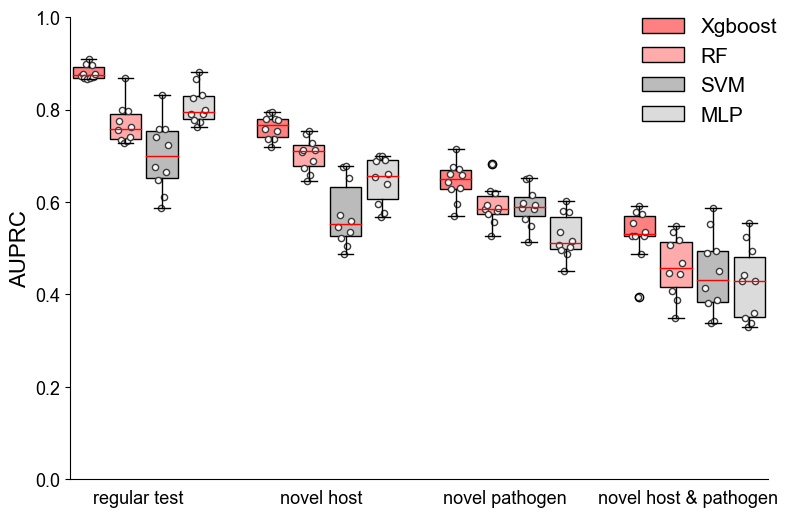

In [15]:
#(3)统计图
#数据
labels = ["Xgboost", "RF",  "SVM",  "MLP"]
colors = ["#FF8080",'#FFABAB',  "#BBBBBB","#DBDBDB",]#colors = ["#FF8080","#FFABAB","#FFDBDB",'#008080','#00ABAB','#00DBDB']

def middle_scatter(x):
    x = np.array(x)
    x.sort()
    return x[np.array([4,6,2,8,0,9,1,7,3,5])]
    

#格式
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# ax.set_xticks()
ax.tick_params(bottom=False,top=False,left=True,right=False)
ax.set_xticklabels(('','     regular test', '','',
                    '','     novel host','','',
                    '','     novel pathogen','','',
                    '','     novel host & pathogen','','',),fontdict={"fontsize":13}, rotation=0)
ax.set_ylim(0,1)
ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontdict={'fontsize':13})

ax.set_title("",fontdict={"fontsize":18},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":18})
ax.set_ylabel("AUPRC",fontdict={"fontsize":16})

#绘图
bps=[]
for idx_t in range(4):#每个测试集
    for idx_m in range(4):#每种方法
        x = idx_t*5+idx_m
        y = auprc_4_4_10[idx_m][idx_t]
        # labels = [labels[idx_m],] if idx_m==0 else ['']
        #ax.scatter()
        
        bplot = ax.boxplot(y,positions=range(x,x+1),widths=0.85,patch_artist=True,labels=[labels[idx_m]], medianprops=dict(color='red'))
        bps.append(bplot)
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[idx_m])     
            patch.set_zorder(1)
            
        ax.scatter(x+np.arange(10)*0.04-0.2, middle_scatter(y), s=20, color="#FBFBFB",edgecolors="#3B3B3B")


# plt.legend(fontsize=15,shadow=False,framealpha=0,bbox_to_anchor=(1.09, 1.04, ))
plt.legend([bps[0]["boxes"][0],bps[1]["boxes"][0],bps[2]["boxes"][0],bps[3]["boxes"][0]],
           labels,
           shadow=False,
           framealpha=0,
           bbox_to_anchor=(1.04, 1.04, ),
           fontsize=15)


In [6]:
# np.save("/tmp/auprc_4.npy",auprc_4_4_10)

In [7]:
# [109]
# def middle_sort(x):
#     x = np.array(sorted(x))
#     return np.hstack((np.flip(x[np.arange(0,len(x),2)]),x[np.arange(1,len(x),2)]))

# x = np.array([0,9,1,8,2,7,3,6,4,5])
# print(middle_sort(x))

/tmp/ipykernel_270720/3006804080.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('','                   regular test',
/tmp/ipykernel_270720/3006804080.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontdict={'fontsize':13})


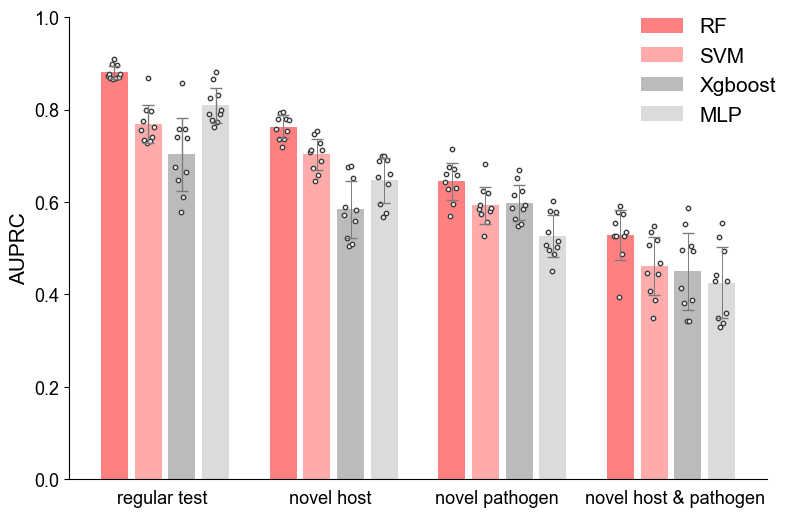

In [10]:
#(3)统计图
#数据
labels = ["RF", "SVM",  "Xgboost",  "MLP"]
colors = ["#FF8080",'#FFABAB',  "#BBBBBB","#DBDBDB",]#colors = ["#FF8080","#FFABAB","#FFDBDB",'#008080','#00ABAB','#00DBDB']
colors = ["#FF8080",'#FFABAB',
          "#BBBBBB","#DBDBDB",
          '#00DBDB','#00ABAB',"#FFABAB",'#B0DBDB',
          ]
def midle_high_sort(x):
    x = np.array(sorted(x))
    x = np.hstack((x[np.arange(0,len(x),2)],np.flipud(x[np.arange(1,len(x),2)])))
    return x
def middle_scatter(x):
    x = np.array(x)
    x.sort()
    return x[np.array([4,6,2,8,0,9,1,7,3,5])]

#格式
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# ax.set_xticks()
ax.tick_params(bottom=False,top=False,left=True,right=False)
ax.set_xticklabels(('','                   regular test', 
                    '','                   novel host',
                    '','                  novel pathogen',
                    '','                      novel host & pathogen',''),fontdict={"fontsize":13}, rotation=0)
ax.set_ylim(0,1)
ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontdict={'fontsize':13})

ax.set_title("",fontdict={"fontsize":15},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})

#绘图
bps=[]
for idx_t in range(4):#每个测试集
    for idx_m in range(4):#每种方法
        x = idx_t*5+idx_m
        y = auprc_4_4_avg[idx_m][idx_t]
        if idx_t==0:
            ax.bar(x, y, width=0.8,label=labels[idx_m],color=colors[idx_m],ecolor='#6B6B6B') # 条形图 or barplot
             
            ax.scatter(x+np.arange(10)*0.04-0.2, middle_scatter(auprc_4_4_10[idx_m][idx_t]), s=10, color="#FBFBFB",edgecolors="#3B3B3B",alpha=1.)    
            ax.errorbar(x, y, yerr=np.std(auprc_4_4_10[idx_m][idx_t]),fmt='',color='#7B7B7B',elinewidth=1,capsize=4,ls="",alpha=1.) # 标准差 or std line

        else:
            ax.bar(x, y, width=0.8,color=colors[idx_m],ecolor='#6B6B6B') # 条形图 or barplot
             
            ax.scatter(x+np.arange(10)*0.04-0.2, middle_scatter(auprc_4_4_10[idx_m][idx_t]), s=10, color="#FBFBFB",edgecolors="#3B3B3B",alpha=1.)   
            ax.errorbar(x, y, yerr=np.std(auprc_4_4_10[idx_m][idx_t]),fmt='',color='#7B7B7B',elinewidth=.7,capsize=4,ls="",alpha=1.) # 标准差 or std line

plt.legend(fontsize=15,shadow=False,framealpha=0,bbox_to_anchor=(1.04, 1.04, ))
